In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('cleanhome.csv')

In [31]:
df.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandSlope_Mod', 'LandSlope_Sev', 'Baths'],
      dtype='object', length=207)

In [15]:
df.head()

GrLivArea  SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  \
0        856     126000          30          0.0     7890            6   
1       1049     139500         120         42.0     4235            5   
2       1001     124900          30         60.0     6060            5   
3       1039     114000          70         80.0     8146            4   
4       1665     227000          60         70.0     8400            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0            6       1939          1950         0.0  ...   
1            5       1984          1984       149.0  ...   
2            9       1930          2007         0.0  ...   
3            8       1900          2003         0.0  ...   
4            6       2001          2001         0.0  ...   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     1   

   SaleCondition_Partial  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                      0             0             0             1   
1                      0             0             0             1   
2                      0             0             0             1   
3                      0             0             0             1   
4                      0             0             0             1   

   LandSlope_Mod  LandSlope_Sev  Baths  
0              0              0    2.0  
1              0              0    3.0  
2              0              0    1.0  
3              0              0    1.0  
4              0              0    3.5  

[5 rows x 207 columns]

## Lasso CV


### all features

In [47]:
features = df.drop('SalePrice', axis=1)
target = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.2,random_state=42)

lcv = LassoCV(normalize=True).fit(X_train, y_train)
print('train score: ',lcv.score(X_train,y_train))
print('test score: ',lcv.score(X_test,y_test))

pd.Series(lcv.coef_, index=X_train.columns).sort_values(ascending=False).nlargest(20)

train score:  0.913126559940548
test score:  0.9021507696816247


Neighborhood_GrnHill     58397.790151
RoofMatl_WdShngl         55195.173802
Exterior1st_PreCast      37544.212094
Neighborhood_StoneBr     36716.951207
Neighborhood_NridgHt     33930.544728
Condition2_PosA          31359.958063
Neighborhood_NoRidge     30396.741240
SaleCondition_Partial    14438.445290
Neighborhood_Somerst     14294.700862
Neighborhood_Crawfor     11434.737025
OverallQual               9372.476365
SaleType_Con              8987.901994
Exterior1st_BrkFace       8925.071632
ExterQual                 8418.205741
Functional_Typ            7811.837008
KitchenQual               6115.199040
LandContour_HLS           6054.069300
Fireplaces                4763.731366
BsmtExposure              4753.834361
Condition1_Norm           4722.449685
dtype: float64

### significant features

In [ ]:
X = df[['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'ExterQual', 'BsmtFinSF1', 
            'TotalBsmtSF','KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 
            'ScreenPorch','MSZoning_FV',]]
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [38]:
lcv = LassoCV(normalize=True).fit(X_train, y_train)

In [39]:
print('train score: ',lcv.score(X_train,y_train))
print('test score: ',lcv.score(X_test,y_test))

train score:  0.8650353765095538
test score:  0.8640781763830074


In [40]:
lcv.alpha_

1.8353442482746911

In [41]:
lcv.intercept_

-674697.2106393569

In [42]:
a = pd.Series(lcv.coef_, index=X.columns).sort_values(ascending=False)

In [43]:
a.nlargest(21)

ExterQual       16344.264008
OverallQual     11643.215763
KitchenQual      9370.672667
Fireplaces       6937.076389
OverallCond      4486.844260
YearBuilt         277.734067
LotFrontage       102.686025
GrLivArea          50.367426
ScreenPorch        42.094876
GarageArea         31.657832
BsmtFinSF1         22.493940
TotalBsmtSF        21.907253
LotArea             0.573052
MSZoning_FV      -446.452133
KitchenAbvGr   -16014.823719
dtype: float64

In [22]:
a.nsmallest(20)

Condition2_PosN        -116873.320657
Heating_OthW            -21195.359553
SaleCondition_Family    -17167.199765
BldgType_Duplex          -8867.764741
BldgType_Twnhs           -6420.255231
BldgType_TwnhsE          -6093.002120
RoofStyle_Mansard        -5783.144975
Foundation_CBlock        -2396.560528
LandSlope_Sev            -2386.063734
Neighborhood_SWISU       -2183.057644
BedroomAbvGr             -2165.753834
Neighborhood_OldTown     -2001.847163
Neighborhood_NWAmes      -1635.034150
Neighborhood_NAmes       -1556.081442
BsmtCond                 -1528.568322
MasVnrType_BrkFace       -1524.987860
Neighborhood_SawyerW     -1371.771871
Exterior1st_Wd Sdng      -1293.781443
Exterior2nd_Plywood       -919.107856
KitchenAbvGr              -785.224649
dtype: float64

Matt's Important Features

GrLivArea      5.526677e+01
GarageArea     3.695868e+01
BsmtFinSF1     2.013229e+01
WoodDeckSF     1.465474e+01
LotArea        4.767911e-01
MasVnrArea     3.867853e+01
KitchenQual    2.406367e+04
TotalBsmtSF    2.935578e+01
ScreenPorch    3.416217e+01
LotFrontage    1.045713e+02
OverallCond    6.627378e+03
Fireplaces     9.965579e+03
YearBuilt      5.097182e+02

<AxesSubplot:>

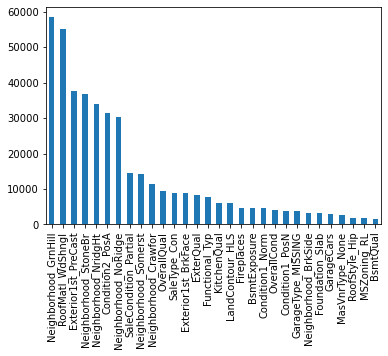

In [23]:
a.iloc[:30].plot(kind='bar')

## np log

In [24]:
features = df.loc[:, df.columns != 'SalePrice']
target = np.log(df['SalePrice'])
X_train1,X_test1,y_train1,y_test1 = train_test_split(features, target, test_size=0.2,random_state=42)

In [25]:
lcvlog = LassoCV(normalize=True).fit(X_train1, y_train1)
print('-'*50)
print("The train set R^2 is %.3f" %(lcvlog.score(X_train1, y_train1)))
print("The test set R^2 is %.3f" %(lcvlog.score(X_test1, y_test1)))

--------------------------------------------------
The train set R^2 is 0.930
The test set R^2 is 0.926


In [26]:
pd.Series(lcvlog.coef_, index=X.columns).sort_values(ascending=False).nlargest(20)

Neighborhood_GrnHill     0.395205
Exterior1st_PreCast      0.339225
SaleCondition_Alloca     0.137234
Neighborhood_Crawfor     0.096973
SaleCondition_Partial    0.087420
Neighborhood_StoneBr     0.076181
Neighborhood_Somerst     0.072170
CentralAir_Y             0.068070
SaleCondition_Normal     0.064369
Neighborhood_NridgHt     0.063513
Exterior1st_BrkComm      0.063319
OverallQual              0.062278
SaleType_Con             0.048105
Exterior1st_BrkFace      0.046629
Neighborhood_ClearCr     0.045944
OverallCond              0.040860
Functional_Typ           0.034886
Condition2_PosA          0.034833
Heating_GasW             0.034721
Condition1_Norm          0.033501
dtype: float64

---

---

## model based feature selection

<AxesSubplot:>

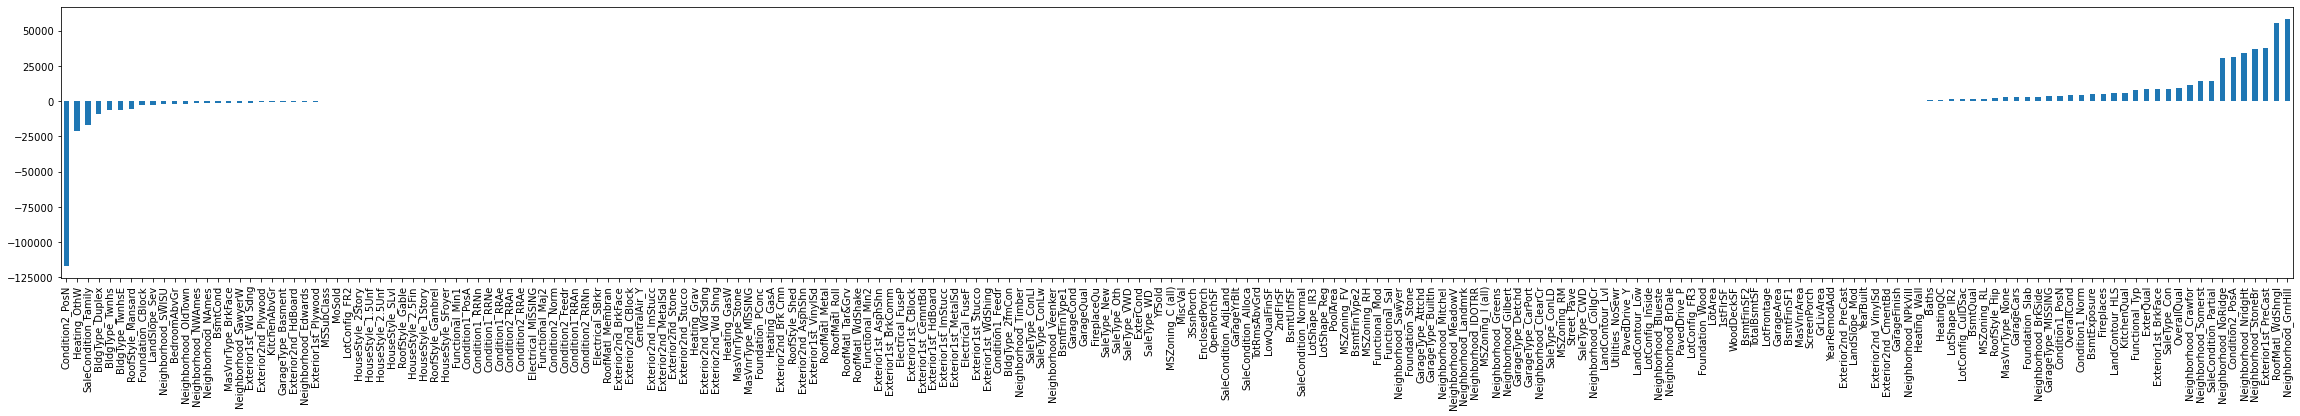

In [28]:
pd.Series(dict(zip(X_train.columns, lcv.coef_))).sort_values().plot(kind='bar',figsize=(40,5))